<h4> Zadanie1 (1pkt): Rozważamy dane dotyczące ekspresji genów z odpowiedzi ludzkich astrocytów U251 na zakażenie wirusem grypy H5N1. Badanie to dostarcza informacji na temat odpowiedzi immunologicznej astrocytów na infekcję wirusową.

* LIF/IL11 to cytokiny z rodziny IL6, aktywujące szlak JAK/STAT3
* SHPRH jest z kolei zaangażowany w naprawę DNA i stabilność genomu

<h4>
    
- Narysuj zależność $LIF$ vs $SHPRH$ oraz $LIF$ vs $IL11$. Skomentuj otrzymane wykresy (także biologicznie, co to może oznaczać?).  
- Zaproponuj adekwatną zależność $LIF \sim f_1(SHRPH)+f_2(IL11)+$, gdzie $f_1$ i $f_2$ to pewne tranformacje (np. wielomianowe). Uzasadnij swój wybór. Nie wydzielaj zbiorów: treningowego/testowego (mało danych). 
- Wyznacz MSE dla modelu oraz narysuj zależność $LIF$ vs $LIF^p$.

Skąd dane? https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS6010

In [17]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('genes_cig.txt', sep = ",")
print(df.head())

       LIF     IL11    SHPRH
0  9.19007  7.25721  6.79607
1  9.26944  7.65776  6.71755
2  9.35100  7.62542  6.80711
3  8.64706  7.37893  6.83646
4  8.92314  7.60337  7.07751


LIF vs IL11

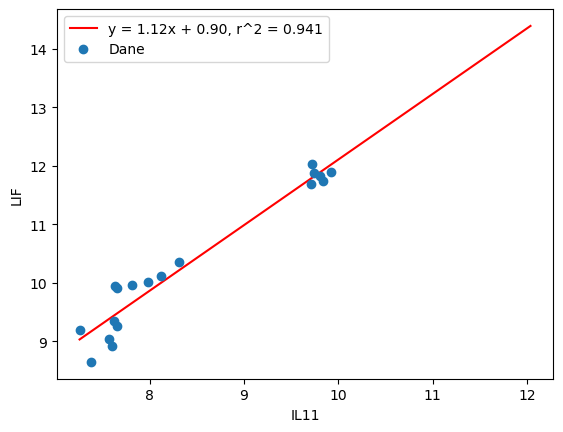

In [19]:
#dane wyglądają relatywnie liniowo, korzystamy z np.polyfit zeby dopasować prostą w celu potwierdzenia
#w sumie nie jest to konieczne, ale fajnie zobaczyć jak działa:)
#r2 wychodzi 0.94 co jest bardzo dobrym wynikiem
#biologicznie : im więcej IL11 tym więcej LIF (wprost proporcjonalnie)

#prametry prostej
a, b = np.polyfit(df['IL11'], df['LIF'], 1)

#R^2
y_fit = a * df['IL11'] + b
ss_res = np.sum((df['LIF'] - y_fit) ** 2)
ss_tot = np.sum((df['LIF'] - np.mean(df['LIF'])) ** 2)
r2 = 1 - ss_res / ss_tot

linspace = np.linspace(min(df['IL11']), max(df['LIF']), 100)
plt.plot(linspace, a * linspace + b, '-', color='red', label=f'y = {a:.2f}x + {b:.2f}, r^2 = {r2:.3f}')
plt.plot(df['IL11'], df['LIF'], 'o', label='Dane')
plt.xlabel('IL11')
plt.ylabel('LIF')
plt.legend()
plt.show()

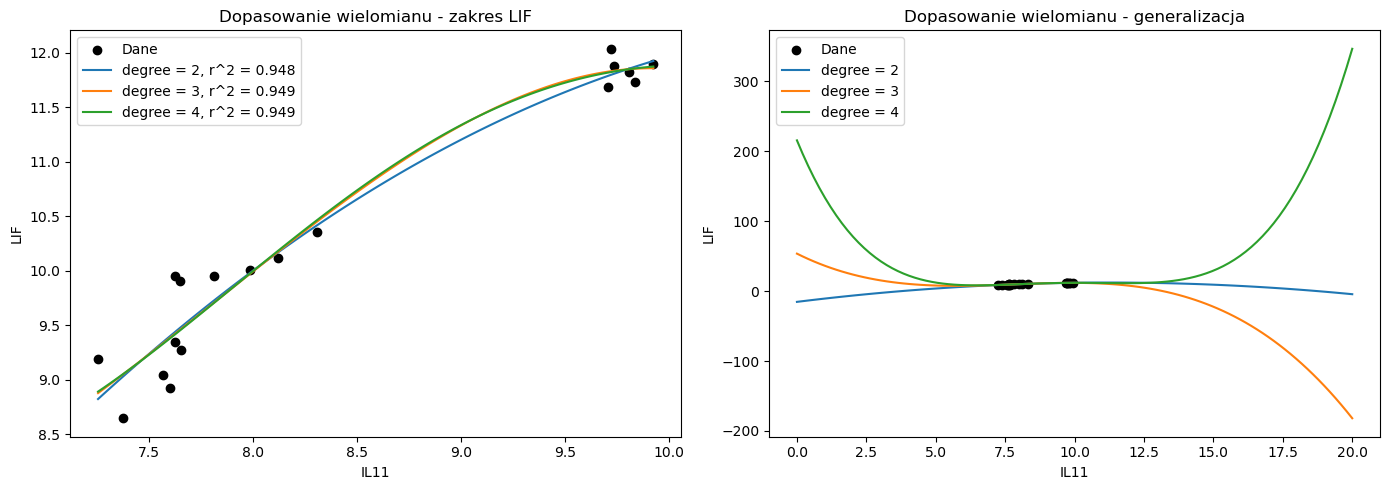

In [20]:
#wielomiany IL11
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

x = np.array(df['IL11'])
y = np.array(df['LIF'])

degrees = [2, 3, 4]
range = np.linspace(min(x), max(x), 100)
range_gen = np.linspace(0, 20, 100)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 wiersz, 2 kolumny

#wykres 1 - zakres danych
axes[0].scatter(x, y, color='black', label='Dane')
for d in degrees:
    model = PolynomialRegression(d)
    model.fit(x[:, np.newaxis], y)
    y_pred = model.predict(range[:, np.newaxis])
    r2 = model.score(x[:, np.newaxis], y)
    axes[0].plot(range, y_pred, label=f"degree = {d}, r^2 = {r2:.3f}")

axes[0].set_title("Dopasowanie wielomianu - zakres LIF")
axes[0].set_xlabel("IL11")
axes[0].set_ylabel("LIF")
axes[0].legend(loc="best")

#wykres 2 - zakres [0,20]
axes[1].scatter(x, y, color='black', label='Dane')
for d in degrees:
    y_pred = PolynomialRegression(d).fit(x[:, np.newaxis], y).predict(range_gen[:, np.newaxis])
    axes[1].plot(range_gen, y_pred, label=f"degree = {d}")
axes[1].set_title("Dopasowanie wielomianu - generalizacja")
axes[1].set_xlabel("IL11")
axes[1].set_ylabel("LIF")
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()

#zakładając ze wartości są zlogarytmizowane, najczestszy zakres wartości wynosi 0-15 (w porywach do 20)
#róznica dopasowania miedzy 2 a 4 stopniem jest minimalna, a 2 dużo lepiej się generalizuje na nowych danych
#wyższe stopnie nie wnoszą nic warościowego


#wybieramy stopien 2 bo jest nieznacznie lepszy niz funckja liniowa
#model wielomianowy bilogicznie również ma sens: im więcej IL11 tym więcej LIF,
#ale po wartości granicznej poziom LIF przestaje rosnąć (wysycenie)

LIF vs SHPRH

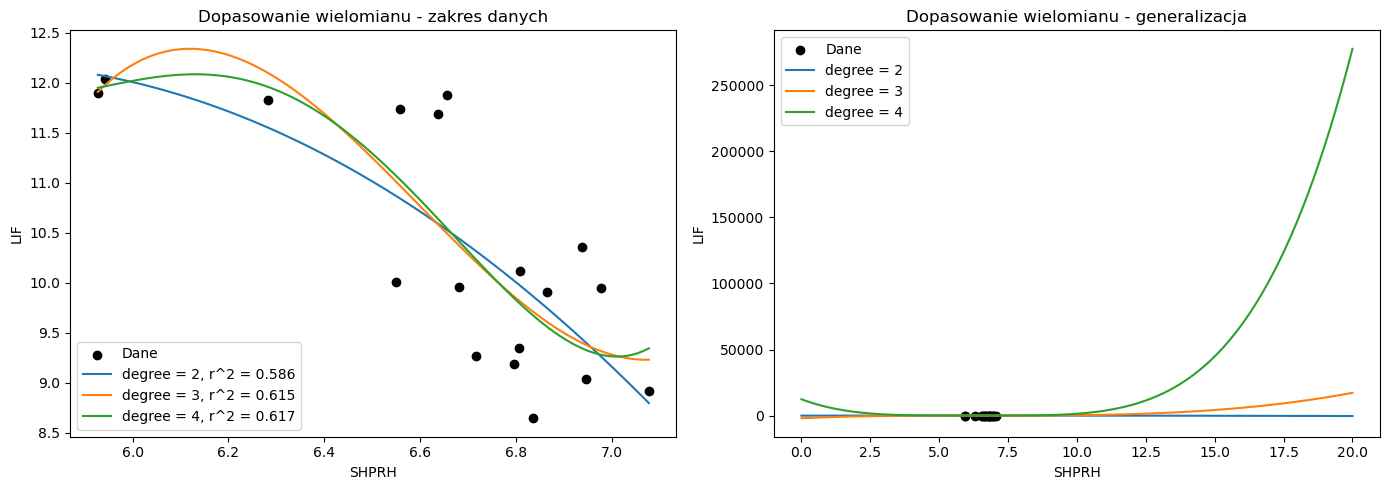

In [21]:
#wielomiany SHPRH

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

x = np.array(df['SHPRH'])
y = np.array(df['LIF'])

degrees = [2,3, 4]
range_x = np.linspace(min(x), max(x), 100)
range_gen = np.linspace(0, 20, 100)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 wiersz, 2 kolumny

#wykres 1 - zakres danych
axes[0].scatter(x, y, color='black', label='Dane')
for d in degrees:
    model = PolynomialRegression(d)
    model.fit(x[:, np.newaxis], y)
    y_pred = model.predict(range_x[:, np.newaxis])
    r2 = model.score(x[:, np.newaxis], y)
    axes[0].plot(range_x, y_pred, label=f"degree = {d}, r^2 = {r2:.3f}")

axes[0].set_title("Dopasowanie wielomianu - zakres danych")
axes[0].set_xlabel("SHPRH")
axes[0].set_ylabel("LIF")
axes[0].legend(loc="best")

#wykres 2 - zakres [0,20]
axes[1].scatter(x, y, color='black', label='Dane')
for d in degrees:
    y_pred = PolynomialRegression(d).fit(x[:, np.newaxis], y).predict(range_gen[:, np.newaxis])
    axes[1].plot(range_gen, y_pred, label=f"degree = {d}")
axes[1].set_title("Dopasowanie wielomianu - generalizacja")
axes[1].set_xlabel("SHPRH")
axes[1].set_ylabel("LIF")
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()

#zakładając ze wartości są zlogarytmizowane, najczestszy zakres wartości wynosi 0-15 (w porywach do 20)
#4 stopień to kompromis miedzy błędem, a przeuczeniem

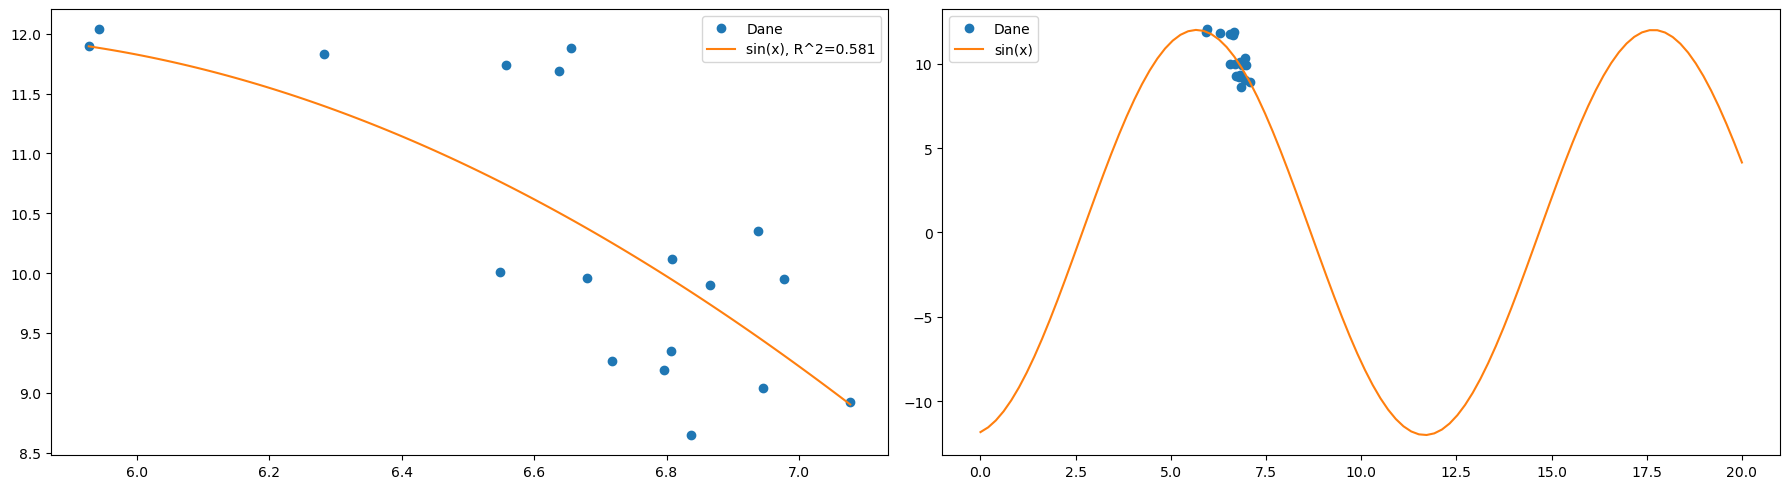

In [22]:
#Alternatywnie, sinus. Nie opisuje danych idealnie, ale dobrze je przybliża i ma większy sens biologiczny
# (nie rośnie nagle przy wysokich warościach jak wielomiany)
#od pewnego poziomu wzrost SHPRH jest skorelowany ze wzrostem LIF, 
# ale potem efekt się nasyca i dalszy wzrost SHPRH nie wpływa na LIF

linspace = np.linspace(min(df['SHPRH']), max(df['SHPRH']), 100)
linspace2 = np.linspace(0, 20, 100)

x = np.array(df['SHPRH'])
y = np.array(df['LIF'])

#sin
def sin_model(x):
    return  12*np.sin((np.pi * x / 6)-1.4)

y_pred = sin_model(df['SHPRH'])

#suma kwadratów reszt i całkowita
SS_res = np.sum((y - y_pred)**2)
SS_tot = np.sum((y - np.mean(y))**2)

#R^2
R2 = 1 - SS_res / SS_tot

#wykres1
fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # 3 wykresy obok siebie
axes[0].plot(x, y, 'o', label='Dane')

axes[0].plot(linspace, sin_model(linspace), '-', label=f'sin(x), R^2={R2 :.3f}')
axes[0].legend()

#wykres2 - generalizacja
axes[1].plot(x, y, 'o', label='Dane')
axes[1].plot(linspace2, sin_model(linspace2), '-', label='sin(x)')
axes[1].legend()

plt.tight_layout()
plt.show()

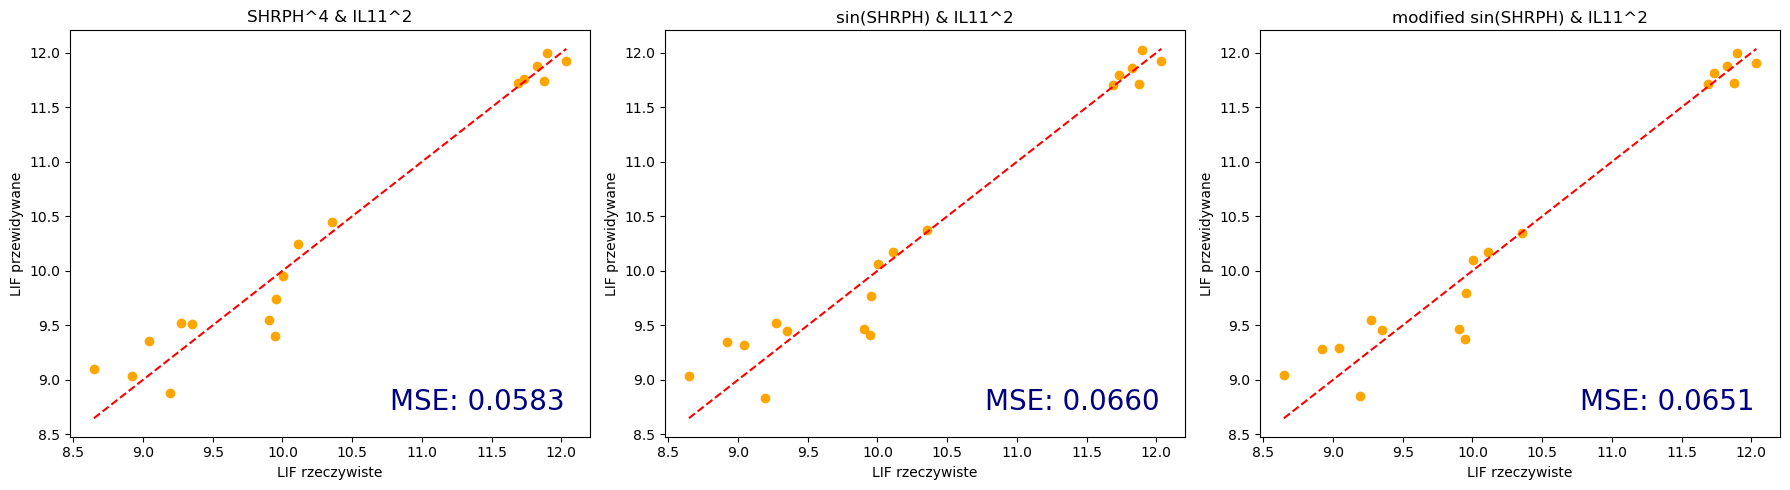

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LIF = np.array(df['LIF'])
IL11 = np.array(df['IL11'])
SHRPH = np.array(df['SHPRH'])

#transformacje
f1_IL11  = np.column_stack([IL11, IL11**2])
f1_SHRPH = np.column_stack([SHRPH, SHRPH**2, SHRPH**3, SHRPH**4])
f2_SHRPH = np.sin(SHRPH)
f3_SHRPH = 12*np.sin((np.pi*SHRPH/6)-1.4)

transformations = [
    (f1_SHRPH, "SHRPH^4"),
    (f2_SHRPH.reshape(-1,1), "sin(SHRPH)"),
    (f3_SHRPH.reshape(-1,1), "modified sin(SHRPH)"),
]

transformations_IL11 = [
    (f1_IL11, 'IL11^2'),
    (f1_IL11, 'IL11^2'),
    (f1_IL11, 'IL11^2')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 wykresy obok siebie

for ax, (f_SHRPH, title), (f_IL11, title2) in zip(axes, transformations, transformations_IL11):
    #macierz cech
    X = np.column_stack([f_IL11, f_SHRPH])
    
    #regresja
    model = LinearRegression()
    model.fit(X, LIF)
    LIF_pred = model.predict(X)
    
    #MSE
    mse = mean_squared_error(LIF, LIF_pred)
    
    #wykres
    ax.scatter(LIF, LIF_pred, color='orange')
    ax.plot([LIF.min(), LIF.max()], [LIF.min(), LIF.max()], 'r--')
    ax.set_xlabel("LIF rzeczywiste")
    ax.set_ylabel("LIF przewidywane")
    ax.text(0.95, 0.05, f"MSE: {mse:.4f}", transform=ax.transAxes, ha='right', va='bottom', fontsize=20, color='navy')
    ax.set_title(title+' & '+ title2)

plt.tight_layout()
plt.show()


<h4> Zadanie2 (3pkt): Rozważ dane dotyczace lokalizacji komórkowej wybranych białek (peptydów).
    
- Pozostaw kategorie: MT (mitochondrialne), SP (sygnałowe), CH (chloroplastów), TH (lumen tylakoidów), czyli odrzuć rekordy Other
- Czy rozważany zbiór danych jest zbalansowany?
- Wybierz cechy do reprezentacji rozważanych sekwencji
- Narysuj histogramy/wykresy pudełkowe rozważanych cech względem kategorii
- Podziel dane na zbiór treningowy i testowy (ewentualnie wydziel jeszcze zbiór walidacyjny)
- Dokonaj standaryzacji danych
- Zbuduj model regresji logistycznej, które zmienne najbardziej istotne?

!!!Zbuduj wiele modeli, pokazując proces tworzenia bardziej użytecznych modeli!!! Co warto zrobić?
- class_weight='balanced' jako argument LR
- SMOTE (z imblearn) - dogenerować kolejne dane
- wybór innych cech
- rozważ nieliniowe transformacje
- rozważ regularyzację (zwłaszcza przy dużej liczbie cech)
- ... im więcej ciekawych pomysłów tym lepiej

Skąd te dane? https://services.healthtech.dtu.dk/services/TargetP-2.0/

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('swissprot_annotated_proteins.tab', sep = "\t", header = None)
df.head()

,0,1,2
0,P10719,MT,46
1,Q38786,CH,55
2,P15289,SP,18
3,P25705,MT,43
4,P00829,MT,48


In [2]:
from Bio import SeqIO

plik_fasta = "targetp.fasta"

ids = []
sqs = []

for rekord in SeqIO.parse(plik_fasta, "fasta"):
    ids.append(str(rekord.id))
    sqs.append(str(rekord.seq))

labs_df = pd.DataFrame(columns=['location', 'sequence'])

for id_val, seq_val in zip(ids, sqs):
    #filtracja df po id
    filtered = df[df[0] == id_val]
    if not filtered.empty: 
        loc = filtered[1].values[0]
        if loc != 'Other':
            # +nowy wiersz do df
            labs_df = pd.concat([labs_df, pd.DataFrame({'location': [loc], 'sequence': [seq_val]})], ignore_index=True)

#liczba sekwencji dla każdej lokalizacji
print(labs_df.groupby('location')['sequence'].count())

#usuwamy losowo 2000 próbek z klasy SP bo jest potężna i cieżko zbalansować dane
#wyniki bez usunięcia wychodziły dużo gorzej ('TH' precision 0.04)
sp_indices = labs_df[labs_df['location'] == 'SP'].index
remove_indices = np.random.choice(sp_indices, size=2000, replace=False)
labs_df= labs_df.drop(remove_indices)

print("\nPo usunięciu 2000 próbek SP:")
print(labs_df.groupby('location')['sequence'].count())

location
CH     227
MT     499
SP    2697
TH      45
Name: sequence, dtype: int64

Po usunięciu 2000 próbek SP:
location
CH    227
MT    499
SP    697
TH     45
Name: sequence, dtype: int64


In [3]:
#moją strategią było dodanie wielu cech opisujących sekwencje białkowe,
# a następnie użycie testu ANOVA do wyboru istotnych cech
# po analizie box plotów dodałam też nieliniową transformację S*turn,
# ponieważ dobrze wyróżnia najgorzej klasyfikowaną grupe - TH

from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_protein_properties(seq: str):
    seq = seq.replace("X", "").replace("U", "").replace("Z", "").replace("B", "") #dziwne aminokwasy, nie ma ich w protein analysis
    s = ProteinAnalysis(seq)
    ss_fraction = s.secondary_structure_fraction()
    aa_fraction = s.get_amino_acids_percent() #procent aminokwasów
    
    prop = [
        len(seq),                         # długość sekwencji
        s.molecular_weight(),             # masa cząsteczkowa
        s.isoelectric_point(),            # punkt izoelektryczny
        s.instability_index(),            # indeks stabilności
        s.gravy(),                        # średni hydropatyczny indeks (GRAVY)
        s.aromaticity(),                  # zawartość aromatycznych aminokwasów
        ss_fraction[0],                   # helix
        ss_fraction[1],                   # turn
        ss_fraction[2],                   # sheet
        s.molar_extinction_coefficient()[0],  # Ekstynkcja przy redukujących warunkach
        s.molar_extinction_coefficient()[1],  # Ekstynkcja przy nie-redukujących warunkach
        s.charge_at_pH(7.0)                     # ładunek netto przy pH 7
    ]

    prop.extend([aa_fraction.get(aa, 0) for aa in "ACDEFGHIKLMNPQRSTVWY"])
    #nowa cecha: S*turn
    fraction_S = aa_fraction.get('S', 0)
    prop.append(fraction_S * ss_fraction[1])
    return prop

#lista nazw cech
prop_names = [
    'length',
    'molecular_weight',
    'isoelectric_point',
    'instability_index',
    'gravy',
    'aromaticity',
    'helix_fraction',
    'turn_fraction',
    'sheet_fraction',
    'molar_extinction_reducing',
    'molar_extinction_nonreducing',
    'charge_pH7'
]

prop_names.extend([f'fraction_{aa}' for aa in "ACDEFGHIKLMNPQRSTVWY"])
prop_names.append('S*turn')

#dodanie cech
labs_df[prop_names] = labs_df["sequence"].apply(lambda seq: pd.Series(compute_protein_properties(seq)))
print(len(labs_df.columns))
print(labs_df.head())

c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\Bio\SeqUtils\ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(


35
   location                                           sequence  length  \
0        SP  MKFLIVFVALFAMAVARPNLAEIVRQVSDVEPEKWSSDVETSDGTS...   104.0   
1        MT  MAAVRALVASRLAAASAFTSLSPGGRTPSQRAALHLSVPRPAARVA...   268.0   
4        MT  MAFFRTVTKLRSRLGQPPSLRDSVRCLQTQASSDLDLHSQLKELIP...   469.0   
5        MT  MCSPQESGMTALSARMLTRSRSLGPGAGPRGCREEPGPLRRREAAA...   312.0   
10       MT  MAAAVAAAAAVRSRILQVSSKVNSTWYPASSFSSSSVPTVKLFIDG...   535.0   

    molecular_weight  isoelectric_point  instability_index     gravy  \
0         11266.5173           4.606141          20.678846 -0.086538   
1         28142.0588           8.502493          31.608955  0.030224   
4         52281.9717           8.661601          34.742431 -0.164819   
5         34389.2014           9.724621          60.171154 -0.452564   
10        57806.9576           8.469486          32.535364 -0.048037   

    aromaticity  helix_fraction  turn_fraction  ...  fraction_N  fraction_P  \
0      0.086538        0.326923       0.

33


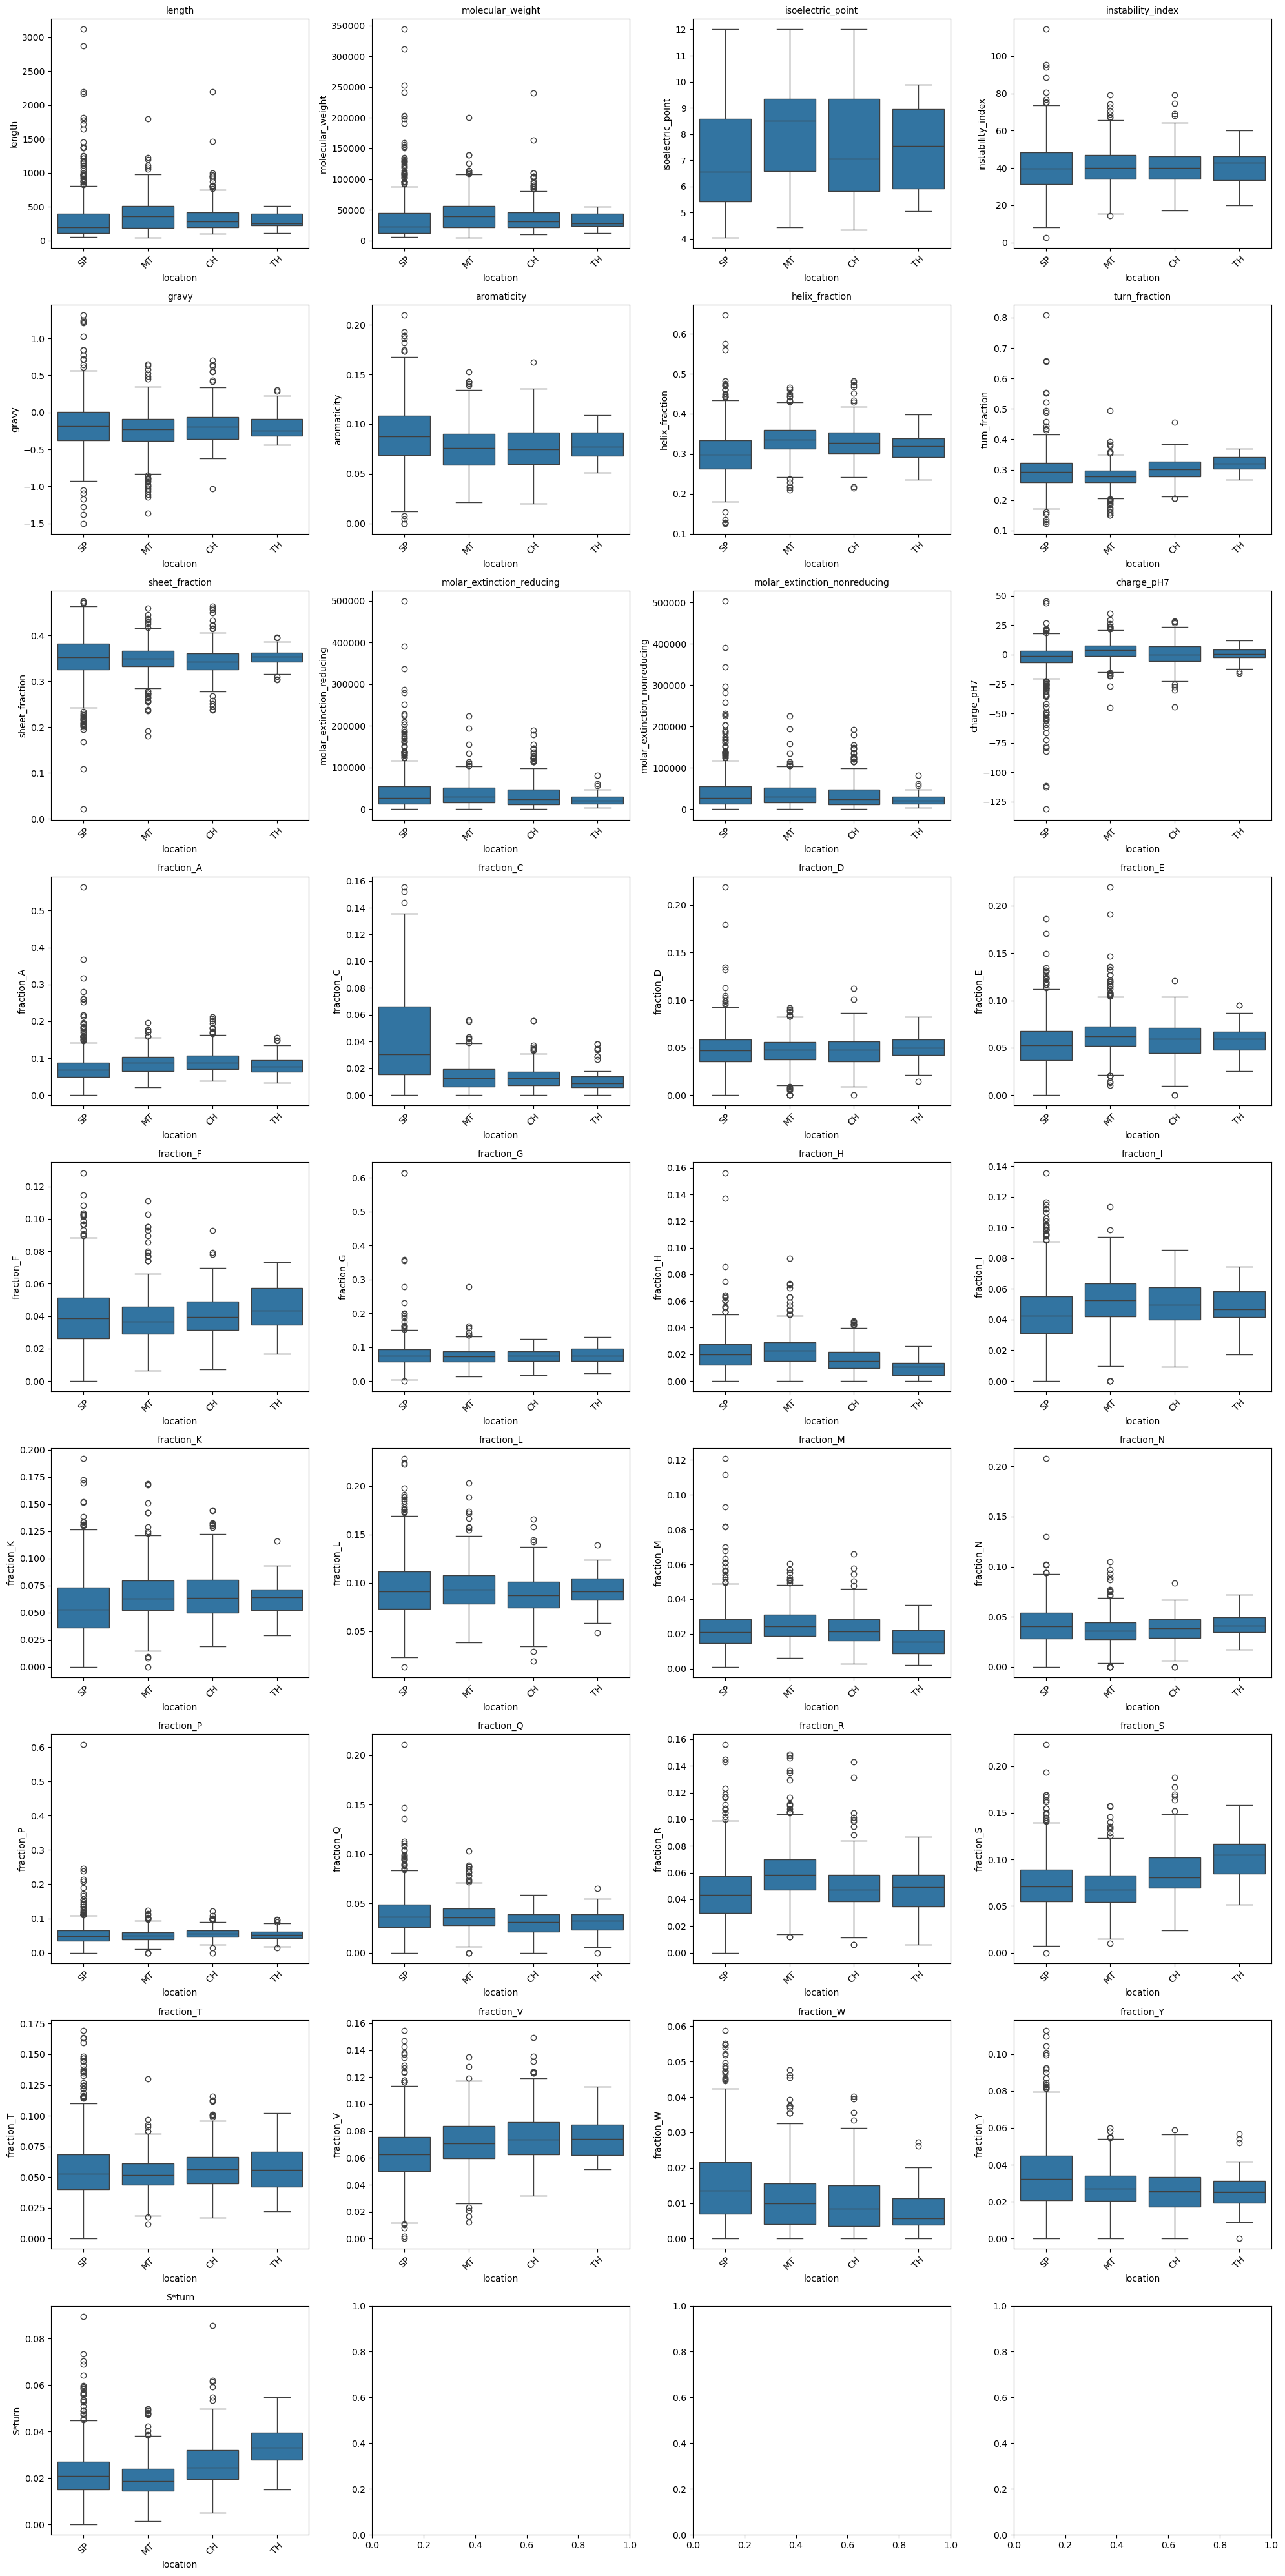

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#lista kolumn z cechami (wszystko poza 'location' i 'sequence')
feature_cols = [col for col in labs_df.columns if col not in ['location', 'sequence']]
print(len(feature_cols))

#tworzymy figure
fig, axes = plt.subplots(9, 4, figsize=(20, 40))
axes = axes.flatten()  #spłaszczamy, żeby iterować po 1D

for i, feature in enumerate(feature_cols):
    sns.boxplot(x='location', y=feature, data=labs_df, ax=axes[i])
    axes[i].set_title(f'{feature}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
#regresja, 3 modele
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

X = labs_df[feature_cols].values
y = labs_df['location'].values

X = np.array(X)
y = np.array(y)

#zakodowanie etykiet (SP, MT, CH, TH -> 0,1,2,3)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#standaryzacja cech 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#równoważenie klas za pomocą SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Rozkład klas po SMOTE:")
(unique, counts) = np.unique(y_train_bal, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"{label_encoder.inverse_transform([cls])[0]}: {cnt}")

Rozkład klas po SMOTE:
CH: 557
MT: 557
SP: 557
TH: 557


c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kajaw\miniconda3\envs\NLP\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kajaw\miniconda3\envs\NLP\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kajaw\miniconda3\envs\NLP\Lib\subprocess.py", line 1540, in _exec

In [6]:
#wybór parametru C, accuracy nie jest najlepszą oceną dokładnosci ale jest najłatwiejsza w implemetacji
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]}
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  
    penalty='l2',    
    max_iter=1000
)

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_bal, y_train_bal)

print("Najlepsze C:", grid.best_params_['C'])
print("Najlepsza dokładność:", grid.best_score_)

c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning

Najlepsze C: 10
Najlepsza dokładność: 0.7177064543759762


c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]}
model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',  
    penalty='l1',    
    max_iter=1000
)

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_bal, y_train_bal)

print("Najlepsze C:", grid.best_params_['C'])
print("Najlepsza dokładność:", grid.best_score_)

c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning

Najlepsze C: 2
Najlepsza dokładność: 0.718156900287197


c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [8]:
#1. trening_basic
model = LogisticRegression(
    multi_class='multinomial',   # obsługa wielu klas
    solver='lbfgs',              # dobrze działa dla multi-class
    max_iter=1000               # więcej iteracji dla konwergencji
    # class_weight='balanced'      # bez sensu jak ejst smote
)
model.fit(X_train_bal, y_train_bal)

#2. trening_lasso
model_lasso = LogisticRegression(
    multi_class='multinomial',
    solver='saga',       # lbfgs nie obsługuje L1
    penalty='l1',
    C=2,               # siła regularyzacji
    max_iter=1000
)
model_lasso.fit(X_train_bal, y_train_bal) 

#3. trening_ridge
model_ridge = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',      # 'lbfgs' obsługuje tylko L2
    penalty='l2',
    C=10,               # siła regularyzacji (mniejsza = silniejsza)
    max_iter=1000
)
model_ridge.fit(X_train_bal, y_train_bal)


for name, model in [("Basic", model), ("Ridge (L2)", model_ridge), ("Lasso (L1)", model_lasso)]:
    y_pred = model.predict(X_test_scaled)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Basic ===
Accuracy: 0.6632653061224489
              precision    recall  f1-score   support

          CH       0.37      0.51      0.43        45
          MT       0.73      0.61      0.67       100
          SP       0.87      0.74      0.80       140
          TH       0.27      0.89      0.41         9

    accuracy                           0.66       294
   macro avg       0.56      0.69      0.58       294
weighted avg       0.73      0.66      0.68       294


=== Ridge (L2) ===
Accuracy: 0.6632653061224489
              precision    recall  f1-score   support

          CH       0.35      0.49      0.41        45
          MT       0.73      0.61      0.67       100
          SP       0.87      0.74      0.80       140
          TH       0.27      0.89      0.41         9

    accuracy                           0.66       294
   macro avg       0.56      0.68      0.57       294
weighted avg       0.73      0.66      0.68       294


=== Lasso (L1) ===
Accuracy: 0.66666

c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
#lasso niezancznie lepszy

y_pred = model_lasso.predict(X_test_scaled)
print(f"\n=== {name} ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


=== Lasso (L1) ===
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

          CH       0.38      0.53      0.44        45
          MT       0.73      0.61      0.67       100
          SP       0.87      0.74      0.80       140
          TH       0.28      0.89      0.42         9

    accuracy                           0.67       294
   macro avg       0.56      0.69      0.58       294
weighted avg       0.73      0.67      0.69       294



In [10]:
#test anova istotności cech
import pandas as pd
from scipy.stats import f_oneway

significant_features = []

for feature in feature_cols:
    #grupowanie wartości cechy po klasach
    groups = [labs_df[labs_df['location'] == cls][feature].values for cls in labs_df['location'].unique()]
    
    #jednoczynnikowa analiza wariancji (ANOVA)
    F, p = f_oneway(*groups)
    # F – statystyka testu F (mierzy stosunek wariancji między grupami do wariancji wewnątrz grup)
    # p – p value 

    if p < 0.05:  # próg istotności
        significant_features.append(feature)

print("Ilość usuniętych cech:", abs(len(significant_features) -len(feature_cols)))
print("Nieistotne cechy:", [f for f in feature_cols if f not in significant_features])

Ilość usuniętych cech: 4
Nieistotne cechy: ['instability_index', 'sheet_fraction', 'fraction_D', 'fraction_P']


In [ ]:
#model dla istotnych cech, wyniki nieznacznie inne (gorsza klasyfikacja TH)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

X2 = labs_df[significant_features].values
X2 = np.array(X2)

#podział danych
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#standaryzacja cech 
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

#równoważenie klas za pomocą SMOTE
X_train_bal2, y_train_bal2 = smote.fit_resample(X_train_scaled2, y_train2)

#trening
model_lasso2 = LogisticRegression(
    multi_class='multinomial',
    solver='saga',       # lbfgs nie obsługuje L1
    penalty='l1',
    C=2,               # siła regularyzacji
    max_iter=1000
)
model_lasso2.fit(X_train_bal2, y_train_bal2) 

#ewaluacja
y_pred2 = model_lasso2.predict(X_test_scaled2)

print("\nAccuracy:", accuracy_score(y_test2, y_pred2))
print("\nClassification report:")
print(classification_report(y_test2, y_pred2, target_names=label_encoder.classes_))
print("\nConfusion matrix:")
print(confusion_matrix(y_test2, y_pred2))


c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy: 0.6666666666666666

Classification report:
              precision    recall  f1-score   support

          CH       0.36      0.53      0.43        45
          MT       0.75      0.63      0.68       100
          SP       0.89      0.72      0.80       140
          TH       0.27      0.89      0.41         9

    accuracy                           0.67       294
   macro avg       0.57      0.69      0.58       294
weighted avg       0.74      0.67      0.69       294


Confusion matrix:
[[ 24  10   5   6]
 [ 19  63   8  10]
 [ 22  11 101   6]
 [  1   0   0   8]]


c:\Users\kajaw\miniconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
